# 2. 출생아 수 및 합계 출산율
- 합계 출산율 : 한 여자가 가임기간(15~49세)에 낳을 것으로 기대되는 평균 출생아 수

In [3]:
import pandas as pd
import xlrd
import openpyxl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_excel('출생아 수 및 합계 출산율.xls', skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30,260.60
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84,0.81


In [10]:
df.index.values # index로 지정되어 있는 '출생아 수'와 '합계 출산율' 사이의 띄어쓰기가 unicode로 인해 다른 단어로 기입됨.

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [14]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
# rename = 특정 단어들의 이름을 바꿈 ({바꾸려는 이름 : 바꾸는 이름})
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30,260.60
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84,0.81


In [15]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [18]:
df.loc['출생아 수'] # columns기준 데이터 출력

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
Name: 출생아 수, dtype: float64

In [19]:
df.iloc[0] # row기준 데이터 출력

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
Name: 출생아 수, dtype: float64

In [20]:
df.iloc[1]

2012    1.297
2013    1.187
2014    1.205
2015    1.239
2016    1.172
2017    1.052
2018    0.977
2019    0.918
2020    0.840
2021    0.810
Name: 합계 출산율, dtype: float64

In [21]:
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30,260.60
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84,0.81


In [25]:
df = df.T # T = row와 column의 위치를 바꾸는 법
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840
2021,260.6,0.810


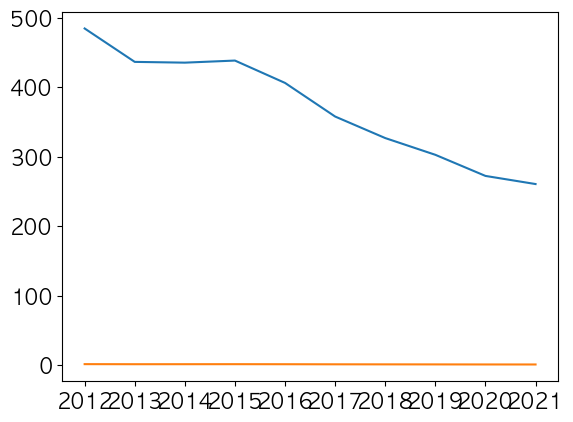

In [26]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

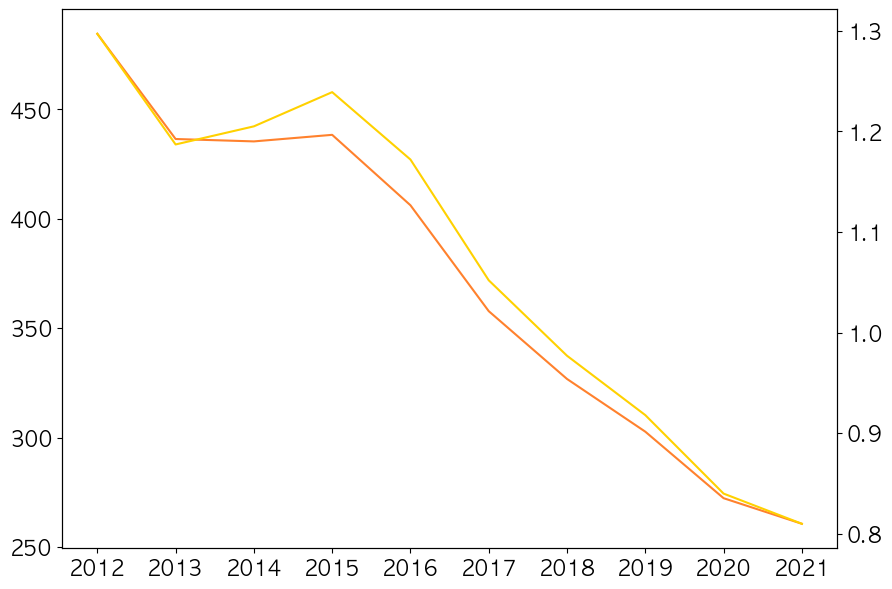

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

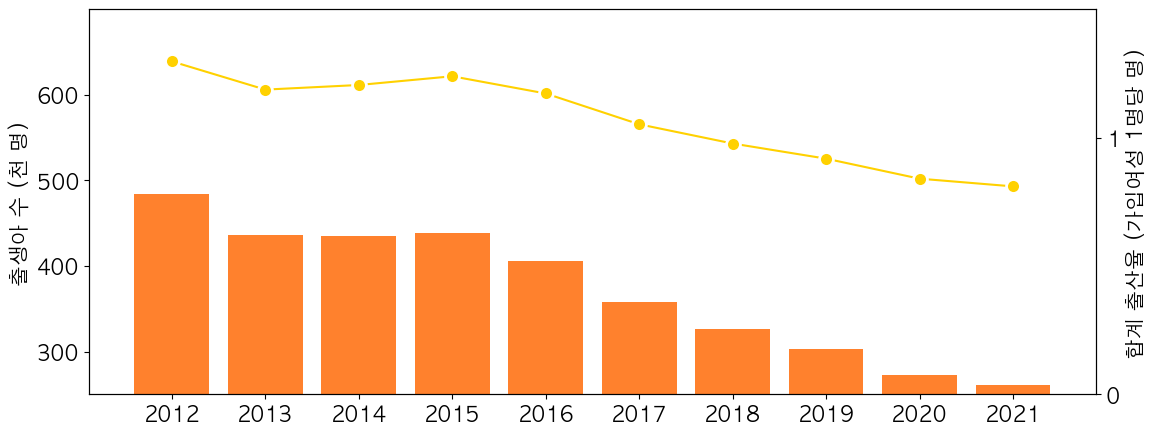

In [49]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('합계 출산율 (가입여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o',markersize=10, markeredgewidth=2, \
         markeredgecolor='w')

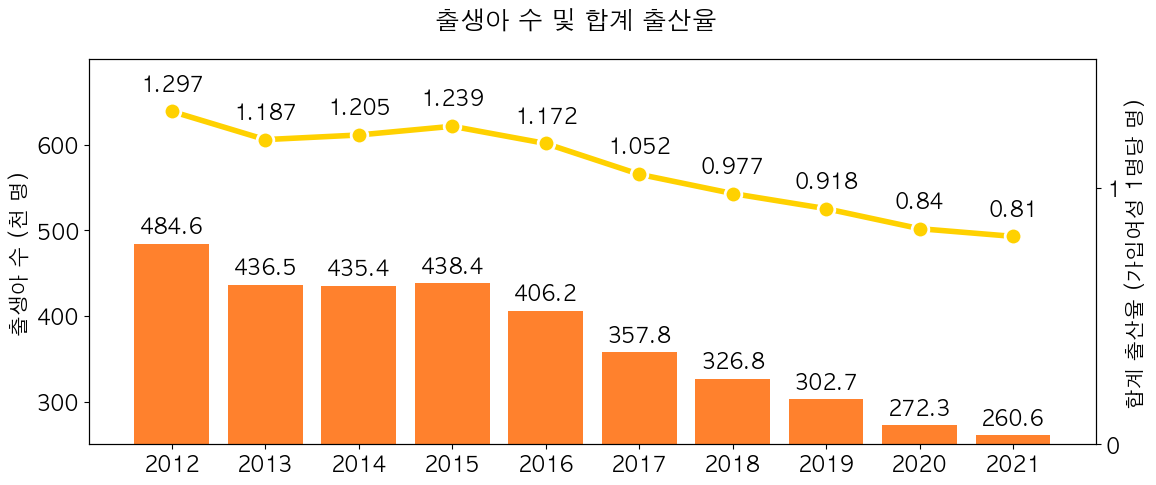

In [66]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율')
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('합계 출산율 (가입여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', lw=4,marker='o',ms=12, \
         mew=2, mec='w')
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.08, val, ha='center')